## Задание 1

In [9]:
import math
import random
import matplotlib.pyplot as plt

In [10]:
class Node:
    def __init__(self, question=None, teacher=None, yes=None, no=None):
        self.question = question
        self.teacher = teacher

        self.yes = yes
        self.no = no

In [11]:
class DecisionTree:
    def __init__(self):
        self.root = Node(
            question="Преподаватель с кафедры МКиИТ?",
            yes = Node(
                question="Преподаватель является заведующим кафедрой?",
                yes=Node(teacher="Городничев Михаил Геннадьевич"),
                no=Node(
                    question="Преподаватель ввел ВвИТ и СиАОД?",
                    yes=Node(
                        question="Преподаватель ввел лекции по этим предметам?",
                        yes=Node(teacher="Симонов Сергей Евгеньевич"),
                        no=Node(teacher="Павликов Артем Евгеньевич")
                    ),
                    no=Node(
                        question="Преподаватель ввел ИТиП?",
                        yes=Node(teacher="Мосева Марина Сергеевна"),
                        no=Node(teacher="Полянцева Ксения Андреевна")
                    )
                )
            ),
            no=Node(
                question="Преподаватель с кафдеры Мат. Анализа?",
                yes=Node(
                    question="Преподаватель ввел лекции?",
                    yes=Node(teacher="Шаймарданова Лилия Кимматовна"),
                    no=Node(teacher="Изотова Анастасия Андреевна")
                ),
                no=Node(
                    question="Преподаватель с кафедры Физики?",
                    yes=Node(teacher="Вальковский Сергей Николаевич"),
                    no=Node(
                        question="Преподаватель с кафедры ТВиПМ?",
                        yes=Node(teacher="Скородумова Елена Александровна"),
                        no=Node(teacher="Королева Светлана Анатольевна")
                    )
                )
            )
        )

    def ask_question(self, node):
            if node.teacher:
                answer = input(f"Это {node.teacher}? (да/нет): ").strip().lower()
                if answer == 'да':
                    print("Угадал!")
                    return
                else:
                    self.add_new_teacher(node)
            else:
                answer = input(f"{node.question} (да/нет): ").strip().lower()
                if answer == 'да':
                    self.ask_question(node.yes)
                else:
                    self.ask_question(node.no)

    def add_new_teacher(self, node):
        new_teacher = input("Как зовут преподавателя, о котором вы думали?: ").strip()
        new_question = input(f"Какой вопрос отличает {new_teacher} от {node.teacher}?: ").strip()
        while True:
            answer = input(f"Для {new_teacher} ответ на этот вопрос 'да' или 'нет'?: ").strip().lower()
            if answer in ['да', 'нет']:
                break
            else:
                print("Пожалуйста, введите 'да' или 'нет'.")

        if answer == 'да':
            node.yes = Node(teacher=new_teacher)
            node.no = Node(teacher=node.teacher)
        else:
            node.no = Node(teacher=new_teacher)
            node.yes = Node(teacher=node.teacher)
        
        node.question = new_question
        node.teacher = None

    def start_game(self):
        print("Добро пожаловать в игру по угадыванию преподавателей!")
        while True:
            self.ask_question(self.root)
            play_again = input("Хотите сыграть снова? (да/нет): ").strip().lower()
            if play_again != 'да':
                print("Спасибо за игру!")
                break

In [ ]:
tree = DecisionTree()
tree.start_game()

Добро пожаловать в игру по угадыванию преподавателей!


Преподаватель с кафедры МКиИТ? (да/нет):  да
Преподаватель является заведующим кафедрой? (да/нет):  нет
Преподаватель ввел ВвИТ и СиАОД? (да/нет):  да
Преподаватель ввел лекции по этим предметам? (да/нет):  нет
Это Павликов Артем Евгеньевич? (да/нет):  нет
Как зовут преподавателя, о котором вы думали?:  Фурлетов
Какой вопрос отличает Фурлетов от Павликов Артем Евгеньевич?:  оалвыдарывл
Для Фурлетов ответ на этот вопрос 'да' или 'нет'?:  да
Хотите сыграть снова? (да/нет):  да
Преподаватель с кафедры МКиИТ? (да/нет):  да
Преподаватель является заведующим кафедрой? (да/нет):  нет
Преподаватель ввел ВвИТ и СиАОД? (да/нет):  да
Преподаватель ввел лекции по этим предметам? (да/нет):  нет
оалвыдарывл (да/нет):  да
Это Фурлетов? (да/нет):  да


Угадал!


## Задание 2

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Area:
    def __init__(self, x_mid, y_mid, w, h):
        self.x_mid = x_mid
        self.y_mid = y_mid
        self.w = w
        self.h = h

    def contains(self, point):
        return (
            point.x >= self.x_mid - self.w and
            point.x <= self.x_mid + self.w and
            point.y >= self.y_mid - self.h and
            point.y <= self.y_mid + self.h
        )

    def intersects(self, search_area):
        return not (
            search_area.x_mid - search_area.w > self.x_mid + self.w or
            search_area.x_mid + search_area.w < self.x_mid - self.w or
            search_area.y_mid - search_area.h > self.y_mid + self.h or
            search_area.y_mid + search_area.h < self.y_mid - self.h
        )


class Quadtree:
    def __init__(self, area, capacity):
        self.area = area
        self.capacity = capacity
        self.points = []
        self.divided = False

    def subdivide(self):
        x_mid, y_mid = self.area.x_mid, self.area.y_mid
        w, h = self.area.w / 2, self.area.h / 2
    
        ne = Area(x_mid + w, y_mid + h, w, h)
        self.northeast = Quadtree(ne, self.capacity)
        nw = Area(x_mid - w, y_mid + h, w, h)
        self.northwest = Quadtree(nw, self.capacity)
        se = Area(x_mid + w, y_mid - h, w, h)
        self.southeast = Quadtree(se, self.capacity)
        sw = Area(x_mid - w, y_mid - h, w, h)
        self.southwest = Quadtree(sw, self.capacity)
    
        self.divided = True

    def insert(self, point):
        if not self.area.contains(point):
            return False
        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()
                
            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

    def find_points_in_intersection(self, search_area, found):
        if not self.area.intersects(search_area):
            return found

        for p in self.points:
            if search_area.contains(p):
                found.append(p)

        if self.divided:
            self.northwest.find_points_in_intersection(search_area, found)
            self.northeast.find_points_in_intersection(search_area, found)
            self.southwest.find_points_in_intersection(search_area, found)
            self.southeast.find_points_in_intersection(search_area, found)

        return found

    def find_nearest_neighbors(self, point, radius):
        search_area = Area(point.x, point.y, radius, radius)
        found_points = self.find_points_in_intersection(search_area, [])
        found_points.sort(key=lambda p: math.sqrt((p.x - point.x)**2 + (p.y - point.y)**2))
        return found_points

    def draw(self, ax):
        rect = plt.Rectangle((self.area.x_mid - self.area.w, self.area.y_mid - self.area.h),
                             2 * self.area.w, 2 * self.area.h, fill=False)
        ax.add_patch(rect)
        
        for p in self.points:
            ax.plot(p.x, p.y, 'bo')
        
        if self.divided:
            self.northeast.draw(ax)
            self.northwest.draw(ax)
            self.southeast.draw(ax)
            self.southwest.draw(ax)

In [4]:
def random_points(num_points, width, height):
    points = []
    for _ in range(num_points):
        x = random.uniform(0, width)
        y = random.uniform(0, height)
        points.append(Point(x, y))
    return points

In [5]:
random.seed(17)

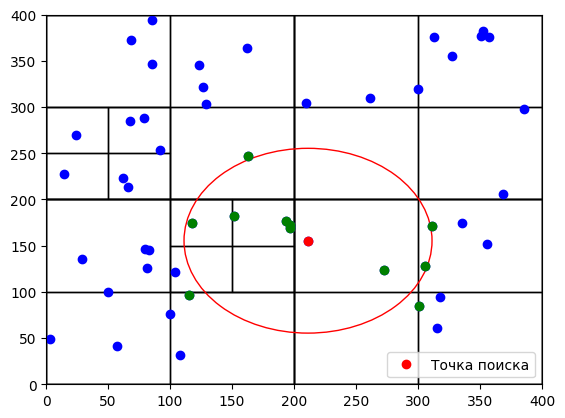

In [8]:
width, height = 400, 400
num_points = 50
radius = 100

area = Area(width / 2, height / 2, width / 2, height / 2)
qt = Quadtree(area, 4)

points = random_points(num_points, width, height)
for point in points:
    qt.insert(point)

fig, ax = plt.subplots()
ax.set_xlim(0, width)
ax.set_ylim(0, height)

qt.draw(ax)

#search_point = Point(random.uniform(0, width), random.uniform(0, height))
search_point = points[6]
nearest_neighbors = qt.find_nearest_neighbors(search_point, radius)
nearest_neighbors.remove(search_point)

ax.plot(search_point.x, search_point.y, 'ro', label='Точка поиска')

for neighbor in nearest_neighbors:
    ax.plot(neighbor.x, neighbor.y, 'go')

search_circle = plt.Circle((search_point.x, search_point.y), radius, color='r', fill=False)
ax.add_patch(search_circle)

plt.legend()
plt.show()